## My Lab 19 
- Quantum Key ditribution for this lab 
- **OBJECTIVES** : Generating random keys and sending it over through simulation

In [2]:
import numpy as np 
from qiskit import * 
import random

### Generating Random Bits
- WHY? Because Alice and Bob need to generate random bits to generate a KEY.
- `getrandbits(n)` gives an **n - bit** random number
- These random numbers are **pseudo random**
- Can also use **quantum_states** to generate truly random numbers

In [38]:
rand_key = bin(random.getrandbits(50))
print("Random Key is :",len(rand_key))

Random Key is : 50


### Appending Strings
- We generate keys in **python** by generating **1 random bit** and then append it to the key that we have for Alice

In [33]:
alice_key = ""
for _ in range(40):
    alice_key += str(random.getrandbits(1))
print(alice_key)
print("Length of key :",len(alice_key))

0100110011010001001001100111000001100100
Length of key : 40


### Appending to Lists
- Store the list of qubits that Alice sends to Bob
- Alice generates **list of qubits one-by-one**

### Functions to create the qubits
- The qubits are produced inside a function and thus help in reducing repetition of creating the qubits

# Quantum Key Ditribution
- **KEY** : It is important for the sender and reciever to communicate through a KEY, something secret that is only known to them. KEY is used for encoding and decoding messages that are sent

- QKD allows us to establish a shared key which is RANDOM.
- Both have the same sequence of **0s and 1s**
- Alice and Bob **DON'T HAVE TO MEET EACH OTHER EVEN ONCE**
- This key is STILL TRANSFERRED SECRETLY.

### GOAL 
- To **ESTABLISH A CONNECTION WITH A SECRET and RANDOM KEY**
- This is a **symmetric key distribution**

# This is a 100% secure key distribution technique

### It employs quantum mechanics to get the knowledge about whether your key was tampered with or not


- Note : the information being transferred is just **CLASSICAL** but **KEY BEING TRANSFERRED IS TRANSFERRED THROUGH A QUANTUM CHANNEL**

# STEPS

## Step1 and Step2
- Alice randomly selects a basis for each qubit : **(+ / x)**
- Bob selects a random basis for each of the qubits : **(+ / x)**

## Step3
- Alice encodes her QUBITS ACCORDING TO THE BASES SHE CHOSE

## LET'S START!!

In [62]:
from qiskit import * 
from random import getrandbits

### Pre - Knowledge 
- **You need to establish the length of the KEY**
- Here -> **KEY : 500 bits**
- Also we have a quantum and a classical channel

In [63]:
length_key = 20
q_channel = []
c_channel = []


## Step1 : Alice selects bit-string and bases
- Generate 500 bits that are random 
- Then generate another 500 bits to specify the **basis**

In [64]:
def select_encoding(length):
    # To store the random 0 / 1
    alice_bits = ""
    # to store the random vertical or diagonal bases 
    alice_bases = ""
    
    for _ in range(length):
        # just use randbits and append to the end of the string
        alice_bits += str(getrandbits(1))
        alice_bases += str(getrandbits(1))
        
    return alice_bits, alice_bases

In [65]:
alice_bits, alice_bases = select_encoding(length_key)
print("Alice's bits :",alice_bits,"\n")
print("Alice's basis string :",alice_bases)

Alice's bits : 10110010010001111101 

Alice's basis string : 10000001111100011001


## Step2 : Bob selects bases
- BOB NEEDS TO SELECT **only bases**
- Why? **BOB ONLY SELECTS THE BASES IN WHICH HE NEEDS TO MEASURE**

In [66]:
def select_bob_measurement(length):
    bob_bases = ""
    # bob selects the bases in which he wants to measure
    for _ in range(length):
        bob_bases += str(getrandbits(1))
        
    return bob_bases

In [67]:
bob_bases = select_bob_measurement(length_key)
print("Bob's string:",bob_bases[:30])

Bob's string: 10110010001011111000


<a id="step3"></a>
## 2.3. Step 3: Encode : All alice

Alice now uses her random list of numbers to generate a bunch of quantum states:
In this excercise we are going to represent the creation of a qubit as an individual `QuantumCircuit` object.

The table below summarizes the qubit states Alice sends, based on the bit of Alice's `alice_bitstring` the corresponding bit of `selected_bases`:

| Bit in Alice's `alice_bitstring` | Corresponding bit in `selected_bases` | Encoding basis | Qubit state sent |
|:----------------:|:--------------------------:|:--------------------------:|:---------------:|
| 0 | 0 | $$|0\rangle,|1\rangle$$ |$$|0\rangle$$ |
| 0 | 1 | $$|+\rangle,|-\rangle$$ |$$|+\rangle$$ |
| 1 | 0 | $$|0\rangle,|1\rangle$$ |$$|1\rangle$$ |
| 1 | 1 | $$|+\rangle,|-\rangle$$ |$$|-\rangle$$ |

In [74]:
def generate_zqubit(q):
    Q = QuantumCircuit(1)
    if(int(q) == 1):
        Q.x(0)
    return Q
    
def generate_xqubit(q):
    Q = QuantumCircuit(1)
    if(int(q) == 0):
        Q.h(0)
    else:
        Q.x(0)
        Q.h(0)
    return Q
        

In [75]:
def encoded_qubits(alice_bits,alice_bases):
    encoded = []
    for i,k in zip(alice_bits,alice_bases):
        
        print(" Alice bit :",i,"Basis :",k)

        if(i == '0' and k == '0'):
            # encoding is + and qubit would be |0>
            q = generate_zqubit(i)
        if(i == '1' and k == '0'):
            # encoding is + and qubit would be |1> 
            q = generate_zqubit(i)
        if(i == '0' and k == '1'):
            # encoding is x and qubit would be |+>
            q = generate_xqubit(i) 
        if(i == '1' and k == '1'):
            q = generate_xqubit(i)
        display(q.draw('mpl'))
        # now append the qubit in the channel 
        encoded.append(q)
    
    return encoded  
    

 Alice bit : 1 Basis : 1


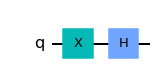

 Alice bit : 0 Basis : 0


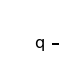

 Alice bit : 1 Basis : 0


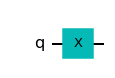

 Alice bit : 1 Basis : 0


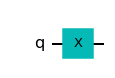

 Alice bit : 0 Basis : 0


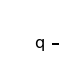

 Alice bit : 0 Basis : 0


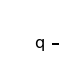

 Alice bit : 1 Basis : 0


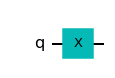

 Alice bit : 0 Basis : 1


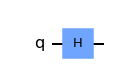

 Alice bit : 0 Basis : 1


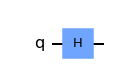

 Alice bit : 1 Basis : 1


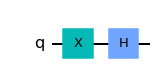

 Alice bit : 0 Basis : 1


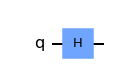

 Alice bit : 0 Basis : 1


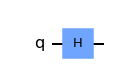

 Alice bit : 0 Basis : 0


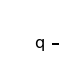

 Alice bit : 1 Basis : 0


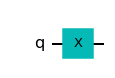

 Alice bit : 1 Basis : 0


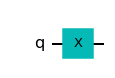

 Alice bit : 1 Basis : 1


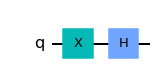

 Alice bit : 1 Basis : 1


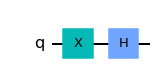

 Alice bit : 1 Basis : 0


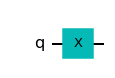

 Alice bit : 0 Basis : 0


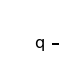

 Alice bit : 1 Basis : 1


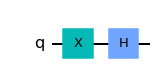

In [76]:
encoded_alice_bits = encoded_qubits(alice_bits,alice_bases)

## Step4 : All alice
- Send the qubits that you have to the **q_channel** 
- These qubits are just assigned to the quantum channel

In [73]:
q_channel = encoded_qubits

## Step5 : Bob Measures

### //to do